## Observations and Insights 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")
# Display the data table for preview
combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [71]:
# Checking the number of mice
number_of_mice=len(combined_df["Mouse ID"].value_counts())
number_of_mice

249

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_points=combined_df["Timepoint"].value_counts()
number_of_time_ID_appears=combined_df['Mouse ID'].value_counts()
number_of_time_ID_appears=number_of_time_ID_appears.reset_index()
# duplicate_mice
duplicate_mice_row=number_of_time_ID_appears.loc[number_of_time_ID_appears['Mouse ID']>len(time_points)]
duplicate_mice_ID=duplicate_mice_row.iloc[0,0]
duplicate_mice_ID


'g989'

In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicate_mice=combined_df.loc[combined_df['Mouse ID']==duplicate_mice_ID]
all_data_for_duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df_clean=combined_df.loc[combined_df['Mouse ID']!=duplicate_mice_ID]
combined_df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice in the clean DataFrame.
len(combined_df_clean["Mouse ID"].value_counts())

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_Tumor_Volume=combined_df_clean.groupby('Drug Regimen').mean().iloc[:,3]
#print (f"***********Mean\n { mean_Tumor_Volume}")
median_Tumor_Volume=combined_df_clean.groupby('Drug Regimen').median().iloc[:,3]
#print (f"***********Median\n { median_Tumor_Volume}")
var_Tumor_Volume=combined_df_clean.groupby('Drug Regimen').var().iloc[:,3]
#print (f"***********Variance\n { var_Tumor_Volume}")
std_Tumor_Volume=combined_df_clean.groupby('Drug Regimen').std().iloc[:,3]
#print (f"***********Standard deviation\n { std_Tumor_Volume}")
sem_Tumor_Volume=combined_df_clean.groupby('Drug Regimen').sem().iloc[:,3]

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Statistics_table=pd.DataFrame({
                          'Mean':mean_Tumor_Volume,
                          'Median':median_Tumor_Volume,
                          'Variance':var_Tumor_Volume,
                          'Std':std_Tumor_Volume,
                          'SEM':sem_Tumor_Volume})
Summary_Statistics_table

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:


# Using the aggregation method, produce the same summary statistics in a single line
single_summary_statistics_table=combined_df_clean.groupby("Drug Regimen").describe().iloc[:,24:31]
single_summary_statistics_table

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                    
                    50%        75%  
Drug Regimen                        
Capomulin     41.557809  45.000000  
Ceftamin      51.776157  56.801438  
Infubinol     51.820584  57.314444  
Ketapril      53.698743  60.870951  
Naftisol      52.509285  59.963034  
Placebo       52.288934  59.916934  
Propriva      50.446266  56.491585  
Ramicane      40.673236  45.000000  
Stelasyn      52.431737  58.719297  
Zoniferol     51.818479  57.954259

## Bar and Pie Charts

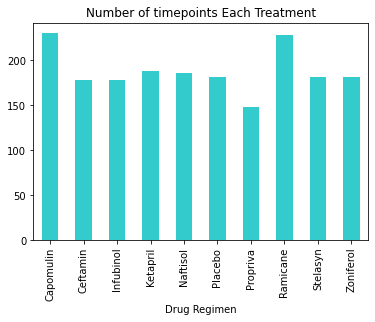

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
single_summary_timepoints_table=combined_df_clean.groupby("Drug Regimen").describe().iloc[:,16:24]
single_summary_timepoints_table
number_of_timepoints=single_summary_timepoints_table.iloc[:,0]

number_of_timepoints.plot(kind='bar',title='Number of timepoints Each Treatment',color='c',alpha=.8)
plt.show()


([<matplotlib.axis.XTick at 0x1ca53465070>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

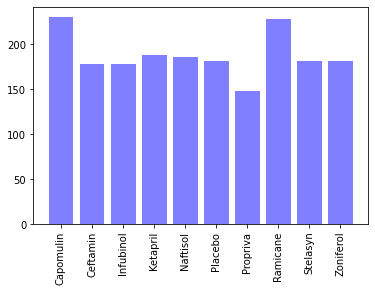

In [80]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np
Drug_Regimen=single_summary_statistics_table.reset_index().iloc[:,0].to_list()
Drug_Regimen
x_axis=np.arange(len(Drug_Regimen))
plt.bar(x_axis,number_of_timepoints,color='b',alpha=.5)
plt.xticks(x_axis,['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'],rotation='vertical')

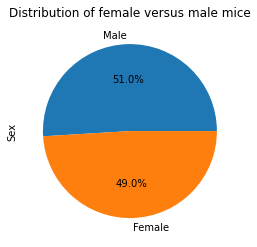

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_female=combined_df_clean['Sex'].value_counts()
male_female.plot(kind='pie',autopct='%1.1f%%',title='Distribution of female versus male mice')
plt.show()

Text(0.5, 1.0, 'Distribution by Sex')

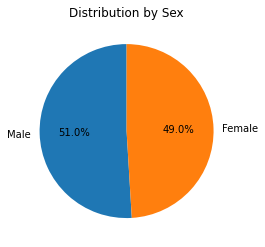

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female=combined_df_clean['Sex'].value_counts()

labels = male_female.reset_index().iloc[:,0]

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(male_female, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')


## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

combined_df_clean
# create a new df showing the data for 4 treatments

new_df=combined_df_clean.set_index('Drug Regimen').loc[['Capomulin','Ramicane','Infubinol','Ceftamin'],:].sort_values('Mouse ID')
# Start by getting the last (greatest) timepoint for each mouse
new_df



,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,30,59.523197,1
Infubinol,a203,Female,20,23,20,55.173336,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,5,48.508468,0
...,...,...,...,...,...,...,...
Infubinol,z581,Female,24,25,25,54.316407,2
Infubinol,z581,Female,24,25,20,51.807944,2
Infubinol,z581,Female,24,25,15,51.196304,2


In [84]:
#getting the mouse Ids
MID=new_df['Mouse ID'].unique() 

final_tumor_size_list=[]
Regimen=[]
for i in MID:
    greatest_time_point=new_df.loc[new_df["Mouse ID"]==i].sort_values(by='Timepoint',ascending=False)
   
    final_tumor_size=round(greatest_time_point.iloc[0,5],2)
    final_tumor_size_list.append(final_tumor_size)
    Regimen.append(greatest_time_point.reset_index().iloc[0,0])
    
#create a new dataframe for the 4 specific treatments and final tumor size in each treament for each mice.
FTS=pd.DataFrame({"Mouse ID":MID,"Drug Regimen":Regimen,"Final Tumor Size":final_tumor_size_list})
FTS

,Mouse ID,Drug Regimen,Final Tumor Size
0,a203,Infubinol,67.97
1,a251,Infubinol,65.53
2,a275,Ceftamin,63.00
3,a411,Ramicane,38.41
4,a444,Ramicane,43.05
...,...,...,...
95,y769,Ceftamin,68.59
96,y793,Capomulin,31.90
97,y865,Ceftamin,64.73
98,z578,Ramicane,30.64


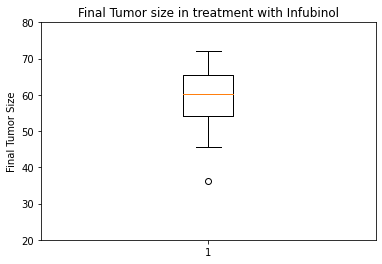

There are 1 outliers in the Final Tumor Size for the mice on Infubinol regimen! 


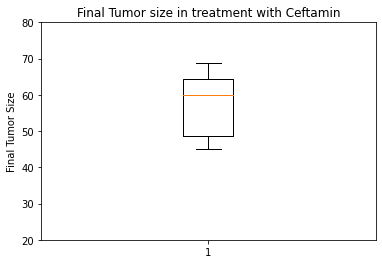

There are 0 outliers in the Final Tumor Size for the mice on Ceftamin regimen! 


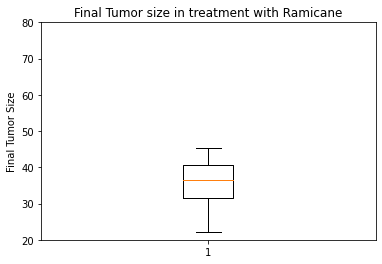

There are 0 outliers in the Final Tumor Size for the mice on Ramicane regimen! 


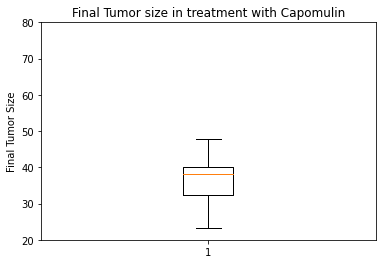

There are 0 outliers in the Final Tumor Size for the mice on Capomulin regimen! 


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=FTS['Drug Regimen'].unique()
tumor_df=pd.DataFrame({treatment_list[0]:[],
                          treatment_list[1]:[],
                           treatment_list[2]:[],
                           treatment_list[3]:[]
                          })
tumor_df

tumor_vol_data=[] 
for d in treatment_list:
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    FTS_sorted=FTS.loc[FTS['Drug Regimen']==d].sort_values('Final Tumor Size')
    quartiles=FTS_sorted['Final Tumor Size'].quantile([.25,.5,.75])
    lower=quartiles[.25]
    upper=quartiles[.75]
    IQR=upper-lower
    tumor_vol_data.append(FTS_sorted['Final Tumor Size'])
#     tumor_df.loc[:,d]=[tumor_vol_data]
    plt.boxplot(FTS_sorted['Final Tumor Size'])
    plt.title(f'Final Tumor size in treatment with {d}')
    plt.ylabel('Final Tumor Size')
    plt.ylim(20,80)
    plt.show()
    outliers= FTS_sorted.loc[(FTS_sorted['Final Tumor Size']>1.5*IQR+upper) | (FTS_sorted['Final Tumor Size']<lower-1.5*IQR)]
    print(f'There are {len(outliers)} outliers in the Final Tumor Size for the mice on {d} regimen! ')
    
   

TypeError: list indices must be integers or slices, not str

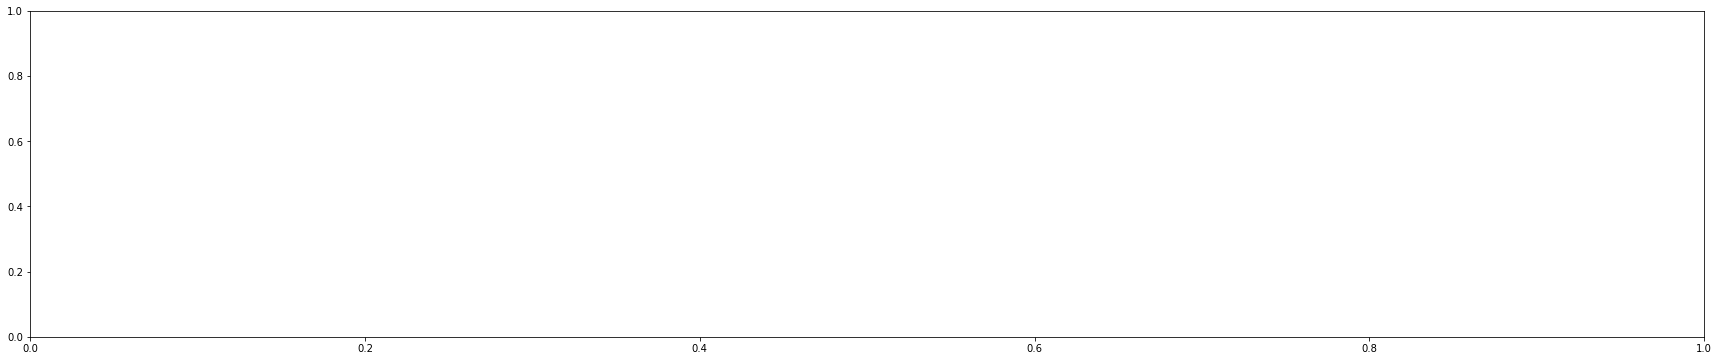

In [86]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data =  [tumor_vol_data[0:24],tumor_vol_data[25:49],tumor_vol_data[50:74],tumor_vol_data[75:100]]
fig, axs = plt.subplots(figsize=(30, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs.boxplot(data[i])
axs.set_title(f'Final Tumor size in treatment with treatment')
plt.xticks([1,2,3,4],treatment_list)
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treated=combined_df_clean.set_index('Drug Regimen').loc['Capomulin',:].sort_values(['Mouse ID','Timepoint'])
capomulin_treated


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,b128,Female,9,22,0,45.000000,0
Capomulin,b128,Female,9,22,5,45.651331,0
Capomulin,b128,Female,9,22,10,43.270852,0
Capomulin,b128,Female,9,22,15,43.784893,0
Capomulin,b128,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...
Capomulin,y793,Male,17,17,25,38.992734,2
Capomulin,y793,Male,17,17,30,35.726023,2
Capomulin,y793,Male,17,17,35,36.327870,2


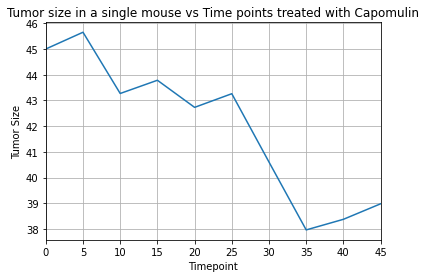

In [ ]:
single_mouse=capomulin_treated.iloc[0,0]
single_mouse
capomulin_mouse_df=capomulin_treated.loc[capomulin_treated.iloc[:,0]==single_mouse,:]
x_axis=capomulin_mouse_df.iloc[:,4]
tvol=capomulin_mouse_df.iloc[:,5]
plt.plot(x_axis,tvol)
plt.xlim(0,45)
plt.grid()
plt.xlabel('Timepoint')
plt.ylabel('Tumor Size')
plt.title('Tumor size in a single mouse vs Time points treated with Capomulin')
plt.show()

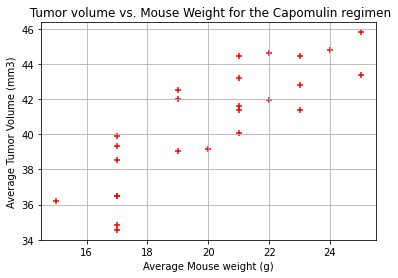

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_tumor=capomulin_treated.groupby('Mouse ID').mean()
average_tumor
x_values=average_tumor.iloc[:,1]
y_values=average_tumor.iloc[:,3]

plt.scatter(x=x_values,y=y_values,marker='+',c='r')
plt.grid()
plt.xlabel('Average Mouse weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(' Tumor volume vs. Mouse Weight for the Capomulin regimen')
plt.show()


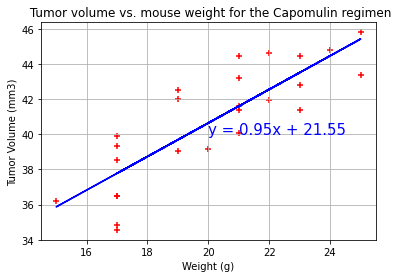

The r-squared is: 0.8419363424694718
The equation of the regression line is: y = 0.95x + 21.55


In [ ]:
# Calculate the correlation coefficient and linear regression model 
#linear regression model
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x=x_values,y=y_values,marker='+',c='r')
plt.grid()
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(' Tumor volume vs. mouse weight for the Capomulin regimen')
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"b-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,40),fontsize=15,color="blue")
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
